In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
clean = pd.read_csv("clean.csv")

In [3]:
mults = pd.read_csv("denorm.csv",index_col="Unnamed: 0")

In [4]:
clean = clean.drop(columns=['stock_31.csv'])

In [5]:
mults = mults[mults['file'] != 'stock_31.csv']

In [8]:
mults = mults[np.bitwise_xor(mults['price_mult'] < 0,mults['price_mult'] > 0)]

In [132]:
missing_tids = []
files = {i:0 for i in mults['file'].unique()}
for i,tid in enumerate(mults['time_id'].unique()):
    t = mults['time_id'] == tid
    s = sum(t)
    
    if(s != 111):
        if(s == 110):
            missing_tids.append(tid)
            temp = mults[mults['time_id'] == tid]['file']
            for i in list(temp):
                files[i] = files[i]+1
        else:
            print("Shit")


In [142]:
{i:files[i] for i in files if files[i] != len(missing_tids)}

{'stock_13.csv': 33,
 'stock_38.csv': 19,
 'stock_89.csv': 33,
 'stock_75.csv': 33,
 'stock_46.csv': 33,
 'stock_80.csv': 21,
 'stock_100.csv': 33,
 'stock_32.csv': 33}

In [151]:
x = np.array([(i in missing_tids) for i in mults['time_id']])
mults = mults[~x]

In [141]:
len(set(missing_tids))

34

In [137]:
nans = mults[np.bitwise_not(np.bitwise_xor(mults['price_mult'] < 0,mults['price_mult'] > 0))]

In [138]:
nans

,file,time_id,price_mult


In [152]:
clean.head()

,seconds_in_bucket,time_id,stock_13.csv,stock_10.csv,stock_38.csv,stock_39.csv,stock_11.csv,stock_29.csv,stock_15.csv,stock_14.csv,...,stock_18.csv,stock_30.csv,stock_20.csv,stock_34.csv,stock_35.csv,stock_21.csv,stock_37.csv,stock_23.csv,stock_22.csv,stock_36.csv
0,0,5,1.000213,1.000127,1.001546,1.000408,1.001512,1.001905,0.999522,1.000666,...,1.001181,1.001724,0.999454,0.999254,1.000995,1.001424,1.002716,1.001483,1.000388,1.002266
1,1,5,1.000267,1.000000,1.001084,1.000195,1.002568,1.002141,1.000139,1.000915,...,1.001181,1.001724,0.999091,0.999229,1.000996,1.001424,1.002716,1.001452,1.000643,1.002125
2,2,5,1.000256,1.000172,1.001569,1.000293,1.001020,1.002171,0.999797,1.000916,...,1.001181,1.001724,0.999091,0.999254,1.000998,1.001529,1.002483,1.001146,1.000606,1.002267
3,3,5,1.000256,0.999778,1.001225,1.000251,1.001021,1.002130,1.000161,1.000781,...,1.001073,1.001724,0.999040,0.999229,1.000963,1.001430,1.002483,1.001096,1.000523,1.002267
4,4,5,1.000256,0.999978,1.001647,1.000129,1.001021,1.002022,0.999858,1.000899,...,1.001072,1.001742,0.999040,0.999229,1.000984,1.001509,1.002483,1.000815,1.000655,1.002344


In [190]:
mydf = pd.DataFrame()
tids = mults['time_id'].unique()
for i,tid in enumerate(tids):
    
    temp = clean[clean['time_id'] == tid].iloc[:600]
    m = [1,1]
    m.extend(mults[mults['time_id'] == tid]['price_mult'].to_numpy())
    mydf = pd.concat([mydf,temp*m])
    print(i/len(tids))

0.0
0.00026343519494204424
0.0005268703898840885
0.0007903055848261328
0.001053740779768177
0.0013171759747102212
0.0015806111696522655
0.0018440463645943098
0.002107481559536354
0.0023709167544783984
0.0026343519494204425
0.002897787144362487
0.003161222339304531
0.003424657534246575
0.0036880927291886197
0.003951527924130664
0.004214963119072708
0.004478398314014752
0.004741833508956797
0.0050052687038988405
0.005268703898840885
0.0055321390937829295
0.005795574288724974
0.006059009483667018
0.006322444678609062
0.006585879873551107
0.00684931506849315
0.007112750263435195
0.007376185458377239
0.007639620653319284
0.007903055848261328
0.008166491043203371
0.008429926238145416
0.00869336143308746
0.008956796628029505
0.00922023182297155
0.009483667017913594
0.009747102212855638
0.010010537407797681
0.010273972602739725
0.01053740779768177
0.010800842992623814
0.011064278187565859
0.011327713382507903
0.011591148577449948
0.01185458377239199
0.012118018967334035
0.01238145416227608
0.0

In [196]:
des = mydf.iloc[:,2:].describe()

In [366]:
tids = mults['time_id'].unique()
meandf = []
stddf = []

for i,tid in enumerate(tids):
    t = mydf[mydf['time_id'] == tid].iloc[:,2:].to_numpy()
    returns = t[1:] - t[:-1]
    returns = returns/t[:-1]
    mean = returns.mean(axis=0)
    std = returns.std(axis=0)
    meandf.append(mean) 
    stddf.append(std) 
    print(i/len(tids))
    

0.0
0.00026343519494204424
0.0005268703898840885
0.0007903055848261328
0.001053740779768177
0.0013171759747102212
0.0015806111696522655
0.0018440463645943098
0.002107481559536354
0.0023709167544783984
0.0026343519494204425
0.002897787144362487
0.003161222339304531
0.003424657534246575
0.0036880927291886197
0.003951527924130664
0.004214963119072708
0.004478398314014752
0.004741833508956797
0.0050052687038988405
0.005268703898840885
0.0055321390937829295
0.005795574288724974
0.006059009483667018
0.006322444678609062
0.006585879873551107
0.00684931506849315
0.007112750263435195
0.007376185458377239
0.007639620653319284
0.007903055848261328
0.008166491043203371
0.008429926238145416
0.00869336143308746
0.008956796628029505
0.00922023182297155
0.009483667017913594
0.009747102212855638
0.010010537407797681
0.010273972602739725
0.01053740779768177
0.010800842992623814
0.011064278187565859
0.011327713382507903
0.011591148577449948
0.01185458377239199
0.012118018967334035
0.01238145416227608
0.0

In [367]:
stats = pd.DataFrame({"mean": np.array(meandf).mean(axis=0),'std': np.array(stddf).mean(axis=0)},index=list(clean.iloc[0,2:].index))
stats.to_csv('chrono.csv')
stats

,mean,std
stock_13.csv,4.862123e-08,0.000110
stock_10.csv,2.396526e-08,0.000154
stock_38.csv,1.516229e-07,0.000202
stock_39.csv,1.823385e-08,0.000118
stock_11.csv,-1.152042e-07,0.000207
...,...,...
stock_21.csv,1.541802e-08,0.000111
stock_37.csv,-1.065555e-08,0.000291
stock_23.csv,-1.541430e-08,0.000193
stock_22.csv,-1.446988e-07,0.000211


In [336]:
stats

,mean,std
stock_13.csv,0.0,0.0
stock_10.csv,0.0,0.0
stock_38.csv,0.0,0.0
stock_39.csv,0.0,0.0
stock_11.csv,0.0,0.0
...,...,...
stock_21.csv,0.0,0.0
stock_37.csv,0.0,0.0
stock_23.csv,0.0,0.0
stock_22.csv,0.0,0.0


In [368]:
means = pd.read_csv("chrono.csv",index_col = 'Unnamed: 0')
means

,mean,std
stock_13.csv,4.862123e-08,0.000110
stock_10.csv,2.396526e-08,0.000154
stock_38.csv,1.516229e-07,0.000202
stock_39.csv,1.823385e-08,0.000118
stock_11.csv,-1.152042e-07,0.000207
...,...,...
stock_21.csv,1.541802e-08,0.000111
stock_37.csv,-1.065555e-08,0.000291
stock_23.csv,-1.541430e-08,0.000193
stock_22.csv,-1.446988e-07,0.000211


In [369]:
df = 0
trues = []
falses = []

mean = means['mean'].to_numpy()
std = means['std'].to_numpy()


for i,tid in enumerate(mults['time_id'].unique()):
    print(i/len(mults['time_id'].unique()))
    temp = clean[clean['time_id'] == tid]
    first = temp[temp['seconds_in_bucket'] == 0]
    last = temp[temp['seconds_in_bucket'] == 599]
    first = first.iloc[0]
    last = last.iloc[0]
    x = mults[mults['time_id']==tid]
    x = x.set_index("file")
    x = x['price_mult']
    x.loc['time_id'] = 1
    x.loc['seconds_in_bucket'] = 1

    firstc = pd.concat([first,x],axis = 1).prod(1)
    lastc = pd.concat([last,x],axis = 1).prod(1)

    firstc.name = f'{tid}_first'
    lastc.name = f'{tid}_last'

    if(type(df) == int):

        df = pd.concat([firstc,lastc],axis=1)
        # df = df.T
    else:
        df = pd.concat([df,firstc,lastc],axis=1)

    ###Trues
    r = np.random.randint(0,599)
    first = temp[temp['seconds_in_bucket'] == r]
    last = temp[temp['seconds_in_bucket'] == r+1]
    first = first.iloc[0]
    last = last.iloc[0]
    x = mults[mults['time_id']==tid]
    x = x.set_index("file")
    x = x['price_mult']
    x.loc['time_id'] = 1
    x.loc['seconds_in_bucket'] = 1

    firstc = pd.concat([first,x],axis = 1).prod(1)
    lastc = pd.concat([last,x],axis = 1).prod(1)

    firstc = firstc.to_numpy()[2:]
    lastc = lastc.to_numpy()[2:]

    dist = lastc - firstc
    dist -= mean
    dist /= std
    dist = np.sum((dist)**2)**0.5
    trues.append(dist)






    

0.0
0.00026343519494204424
0.0005268703898840885
0.0007903055848261328
0.001053740779768177
0.0013171759747102212
0.0015806111696522655
0.0018440463645943098
0.002107481559536354
0.0023709167544783984
0.0026343519494204425
0.002897787144362487
0.003161222339304531
0.003424657534246575
0.0036880927291886197
0.003951527924130664
0.004214963119072708
0.004478398314014752
0.004741833508956797
0.0050052687038988405
0.005268703898840885
0.0055321390937829295
0.005795574288724974
0.006059009483667018
0.006322444678609062
0.006585879873551107
0.00684931506849315
0.007112750263435195
0.007376185458377239
0.007639620653319284
0.007903055848261328
0.008166491043203371
0.008429926238145416
0.00869336143308746
0.008956796628029505
0.00922023182297155
0.009483667017913594
0.009747102212855638
0.010010537407797681
0.010273972602739725
0.01053740779768177
0.010800842992623814
0.011064278187565859
0.011327713382507903
0.011591148577449948
0.01185458377239199
0.012118018967334035
0.01238145416227608
0.0

In [370]:
df = df.T

In [371]:
#Falses
falses = []
mean = means['mean'].to_numpy()
std = means['std'].to_numpy()

total_rows = df.shape[0]
rs = np.random.randint(0,total_rows,size=(len(trues),2))
for i in range(len(trues)):
    f = rs[i,0]
    l = rs[i,1]

    first = df.iloc[f]
    last = df.iloc[l]

    firstc = first.to_numpy()[2:]
    lastc = last.to_numpy()[2:]

    dist = lastc - firstc
    dist -= mean
    dist /= std
    dist = np.sum((dist)**2)**0.5
    falses.append(dist)

    

In [372]:
firsts = df.iloc[0::2]
lasts = df.iloc[1::2]
firsts

,seconds_in_bucket,time_id,stock_13.csv,stock_10.csv,stock_38.csv,stock_39.csv,stock_11.csv,stock_29.csv,stock_15.csv,stock_14.csv,...,stock_18.csv,stock_30.csv,stock_20.csv,stock_34.csv,stock_35.csv,stock_21.csv,stock_37.csv,stock_23.csv,stock_22.csv,stock_36.csv
5_first,0.0,5.0,38.888545,118.639054,275.150129,159.300633,182.424791,318.065217,155.931719,148.246803,...,1641.280922,164.486657,119.266609,241.950048,54.372338,36.628539,2331.898256,474.636610,277.885652,136.921542
11_first,0.0,11.0,43.666197,105.252486,267.011253,164.752874,186.572562,333.481590,152.451661,139.757881,...,1887.812170,188.395216,123.319802,236.463552,52.044245,33.838653,2112.022294,469.690248,305.842075,146.365487
16_first,0.0,16.0,38.346402,59.687275,281.963325,144.702458,116.461962,244.727448,122.858410,100.894506,...,943.731303,167.439712,125.070452,182.685661,47.224424,33.197142,1653.623609,315.442376,240.455363,89.862980
31_first,0.0,31.0,42.303361,85.160709,246.150205,153.298100,159.207569,312.516718,146.815839,125.811947,...,1638.590062,204.290284,125.490860,228.916515,41.659683,35.135110,2155.751037,436.450369,300.215346,149.225682
62_first,0.0,62.0,42.368231,88.938451,247.469802,150.168486,158.361435,309.030201,142.312362,120.212335,...,1680.061098,196.700500,125.684623,223.331106,44.085060,34.516727,2126.461149,423.571915,292.422678,147.673525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32751_first,0.0,32751.0,42.967215,107.749404,275.005974,165.627955,174.276442,327.585161,153.293406,132.399460,...,1886.414124,189.546107,118.312693,233.480825,46.644398,33.493077,2056.015178,465.048979,293.446634,164.116002
32753_first,0.0,32753.0,43.424461,102.443656,267.842601,161.662732,178.861715,330.147377,149.925894,137.931308,...,1923.166707,188.616419,120.575304,235.808452,48.314098,33.007637,2078.177666,467.176799,300.216313,147.495360
32758_first,0.0,32758.0,42.035351,60.960462,266.438480,144.737528,136.474470,283.182856,124.050014,103.633138,...,1298.087326,188.358674,115.755752,212.431103,34.159847,31.181266,1853.834383,372.938240,253.593582,128.748862
32763_first,0.0,32763.0,35.556423,46.970635,297.898099,148.806168,95.657089,215.525585,102.232808,92.303496,...,605.876211,155.287313,121.667821,178.034214,44.679499,28.932800,1429.634072,260.418995,176.988440,75.241017


In [373]:
final = []
c = 0
mean = means['mean'].to_numpy()
std = means['std'].to_numpy()
for row in firsts.iterrows():
    print(c/3830)
    first = row[1].to_numpy()[2:]

    ztid = row[1]['time_id']

    distance = 1e7
    final_tid = -1
    for l in lasts.iterrows():
        last = l[1].to_numpy()[2:]
        ftid = l[1]['time_id']
        dist = last - first
        dist -= mean
        dist /= std
        dist = np.sum((dist)**2)**0.5
        if(dist < distance and ftid != ztid):
            distance = dist
            final_tid = ftid


    

    final.append([final_tid,ztid,distance])
    c+=1

0.0
0.0002610966057441253
0.0005221932114882506
0.000783289817232376
0.0010443864229765013
0.0013054830287206266
0.001566579634464752
0.0018276762402088772
0.0020887728459530026
0.002349869451697128
0.0026109660574412533
0.0028720626631853785
0.003133159268929504
0.003394255874673629
0.0036553524804177544
0.0039164490861618795
0.004177545691906005
0.004438642297650131
0.004699738903394256
0.004960835509138381
0.005221932114882507
0.005483028720626632
0.005744125326370757
0.0060052219321148825
0.006266318537859008
0.006527415143603133
0.006788511749347258
0.007049608355091384
0.007310704960835509
0.007571801566579634
0.007832898172323759
0.008093994778067885
0.00835509138381201
0.008616187989556136
0.008877284595300261
0.009138381201044387
0.009399477806788513
0.009660574412532636
0.009921671018276762
0.010182767624020888
0.010443864229765013
0.010704960835509139
0.010966057441253264
0.011227154046997388
0.011488250652741514
0.01174934725848564
0.012010443864229765
0.01227154046997389
0

In [374]:
first = pd.DataFrame(final,columns=["last_second","first_second","distance"])
first.sort_values("distance",ascending=False)

,last_second,first_second,distance
1592,21446.0,13484.0,2.999715e+06
1476,7566.0,12533.0,2.749344e+06
913,12533.0,7566.0,2.708614e+06
3130,23153.0,26522.0,2.309347e+06
1816,22496.0,15209.0,2.306685e+06
...,...,...,...
803,29761.0,6619.0,2.723234e+04
2273,10220.0,18949.0,2.610220e+04
1704,13880.0,14312.0,2.607084e+04
1198,18949.0,10220.0,2.603098e+04


In [375]:
len(first.iloc[:,1].unique())

3796

In [376]:
distances = np.sort(first['distance'].to_numpy())

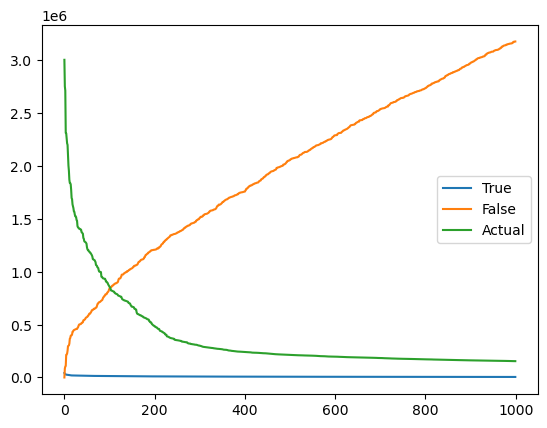

In [454]:
trues = sorted(trues,reverse=True)
falses = sorted(falses,reverse=False)
distances = np.sort(distances)[::-1]
first = 0
last = 1000
plt.plot(trues[first:last])
plt.plot(falses[first:last])
plt.plot(distances[first:last])
plt.legend(["True","False","Actual"])

In [331]:
np.std(distances)

1048.1147922354207

In [63]:
thresh = 1e6
x = len(distances[distances<thresh])/len(distances)

falses = np.array(falses)
y = len(falses[falses>thresh])/len(falses)

In [64]:
x,y

(0.9793733681462141, 0.9665796344647519)

In [ ]:
#Get time_ids live
#start with one
#get the closest
#if looped get the other colsest
#stop at thresh
#keep the longest chain



In [ ]:
mean = means['mean'].to_numpy()
std = means['std'].to_numpy()
def distance(x,y):
    x = x.iloc[:,2:].to_numpy()
    y = y.iloc[:,2:].to_numpy()
    dist = (y-x)/x
    dist -= mean
    dist /= std

In [477]:
tids = mults['time_id'].unique()
chains = []
chains_dist = []
for i,tid in enumerate(tids):
    chain = [tid]
    chain_dist = [0]
    while(chain_dist[-1] < 2e6):
        index = f"{tid}_last"

        current = df.loc[index]
        before = current.iloc[2:].to_numpy()
        after = lasts.iloc[:,2:]
        dist = (after-before)/before
        dist -= mean
        dist /= std
        dist = dist.pow(2).sum(axis=1)
        tempptid = tid
        act_min = dist.min()
        index = dist.argmin()
        index = dist.index[index]
        r = lasts.loc[index]
        tempptid = r['time_id']

        while((tempptid == tid) or (tempptid in chain)):

            dist = dist.drop(index)
            act_min = dist.min()
            index = dist.argmin()
            index = dist.index[index]
            r = lasts.loc[index]
            tempptid = r['time_id']

        chain.append(tempptid)
        chain_dist.append(act_min)
        # print(tempptid,act_min)

    chains.append(chain)
    chains_dist.append(chain_dist)
        # dist**2
    print(i/len(tids))

0.0
0.00026343519494204424
0.0005268703898840885
0.0007903055848261328
0.001053740779768177
0.0013171759747102212
0.0015806111696522655
0.0018440463645943098
0.002107481559536354
0.0023709167544783984
0.0026343519494204425
0.002897787144362487
0.003161222339304531
0.003424657534246575
0.0036880927291886197
0.003951527924130664
0.004214963119072708
0.004478398314014752
0.004741833508956797
0.0050052687038988405
0.005268703898840885
0.0055321390937829295
0.005795574288724974
0.006059009483667018
0.006322444678609062
0.006585879873551107
0.00684931506849315
0.007112750263435195
0.007376185458377239
0.007639620653319284
0.007903055848261328
0.008166491043203371
0.008429926238145416
0.00869336143308746
0.008956796628029505
0.00922023182297155
0.009483667017913594
0.009747102212855638
0.010010537407797681
0.010273972602739725
0.01053740779768177
0.010800842992623814
0.011064278187565859
0.011327713382507903
0.011591148577449948
0.01185458377239199
0.012118018967334035
0.01238145416227608
0.0

In [481]:
np.argmax([len(chain) for chain in chains])

1671

In [484]:
np.max([len(chain) for chain in chains])

78

In [494]:
np.argmin([np.mean(i) for i in chains_dist])

2975

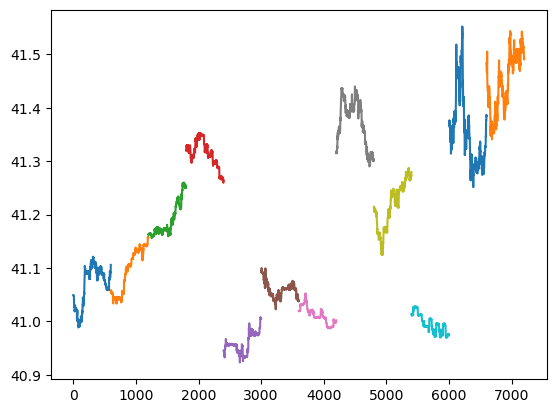

In [495]:
vis = []
for t in chains[2975]:
    vis.extend(mydf[mydf['time_id'] == t]['stock_13.csv'].to_numpy())
for i in range(0,len(vis),600):
    plt.plot(range(i,i+600),vis[i:i+600])
    # plt.scatter(range(0,14000,600))

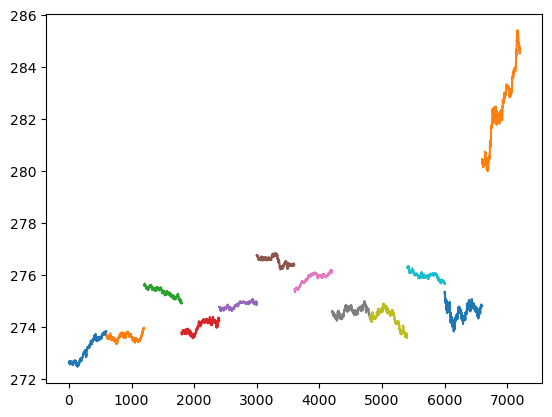

In [496]:
vis = []
for t in chains[2975]:
    vis.extend(mydf[mydf['time_id'] == t]['stock_50.csv'].to_numpy())
for i in range(0,len(vis),600):
    plt.plot(range(i,i+600),vis[i:i+600])
    # plt.scatter(range(0,14000,600))

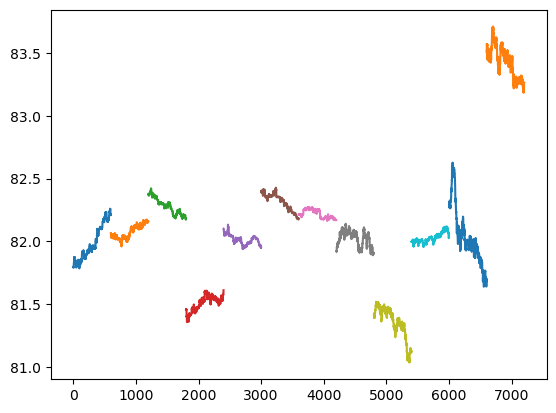

In [499]:
vis = []
for t in chains[2975]:
    vis.extend(mydf[mydf['time_id'] == t]['stock_10.csv'].to_numpy())
for i in range(0,len(vis),600):
    plt.plot(range(i,i+600),vis[i:i+600])
    # plt.scatter(range(0,14000,600))

In [422]:
mydf.to_csv("denorm_data.csv")

In [94]:
matrix = firsts.iloc[:,2:].to_numpy()
mc = current.iloc[2:].to_numpy()
matrix-mc

array([[ 37.88854474,  77.97482012, -22.07732234, ..., 290.68883594,
        134.49675334,  73.89059042],
       [ 42.66619655,  64.5882517 , -30.21619753, ..., 285.74247329,
        162.45317692,  83.33453486],
       [ 37.34640241,  19.02304108, -15.26412588, ..., 131.49460222,
         97.06646426,  26.83202772],
       ...,
       [ 34.55642297,   6.30640096,   0.670648  , ...,  76.47122076,
         33.59954141,  12.21006449],
       [ 37.05393909,  22.03532782, -14.70169121, ..., 126.32216062,
         92.67199622,  29.38937759],
       [  0.        ,  -0.67618086,  -5.91807527, ...,  -1.47147319,
         -0.97395939,  -0.70507885]])

In [95]:
matrix

array([[ 38.88854474, 118.63905439, 275.15012852, ..., 474.63661017,
        277.88565165, 136.92154247],
       [ 43.66619655, 105.25248597, 267.01125333, ..., 469.69024752,
        305.84207522, 146.36548691],
       [ 38.34640241,  59.68727535, 281.96332498, ..., 315.44237645,
        240.45536257,  89.86297977],
       ...,
       [ 35.55642297,  46.97063523, 297.89809886, ..., 260.41899498,
        176.98843972,  75.24101654],
       [ 38.05393909,  62.69956209, 282.52575965, ..., 310.26993484,
        236.06089452,  92.42032964],
       [  1.        ,  39.98805341, 291.30937559, ..., 182.47630104,
        142.41493891,  62.3258732 ]])

In [315]:
mfinal = []
c = 0
for row in lasts.iterrows():
    print(c/3830)
    first = row[1].to_numpy()[2:]

    ztid = row[1]['time_id']

    distance = 1000
    final_tid = -1
    for l in firsts.iterrows():
        last = l[1].to_numpy()[2:]
        ftid = l[1]['time_id']
        dist = np.sum((first-last)**2)**0.5
        if(dist < distance and ftid != ztid):
            distance = dist
            final_tid = ftid

    final.append([final_tid,ztid,distance])
    c+=1
mfirst = pd.DataFrame(final,columns=["first_second","last_second","distance"])


0.0
0.0002610966057441253
0.0005221932114882506
0.000783289817232376
0.0010443864229765013
0.0013054830287206266
0.001566579634464752
0.0018276762402088772
0.0020887728459530026
0.002349869451697128
0.0026109660574412533
0.0028720626631853785
0.003133159268929504
0.003394255874673629
0.0036553524804177544
0.0039164490861618795
0.004177545691906005
0.004438642297650131
0.004699738903394256
0.004960835509138381
0.005221932114882507
0.005483028720626632
0.005744125326370757
0.0060052219321148825
0.006266318537859008
0.006527415143603133
0.006788511749347258
0.007049608355091384
0.007310704960835509
0.007571801566579634
0.007832898172323759
0.008093994778067885
0.00835509138381201
0.008616187989556136
0.008877284595300261
0.009138381201044387
0.009399477806788513
0.009660574412532636
0.009921671018276762
0.010182767624020888
0.010443864229765013
0.010704960835509139
0.010966057441253264
0.011227154046997388
0.011488250652741514
0.01174934725848564
0.012010443864229765
0.01227154046997389
0

In [288]:
t = np.cumsum(sorted(first['distance'].to_numpy()))
t/=t[-1]

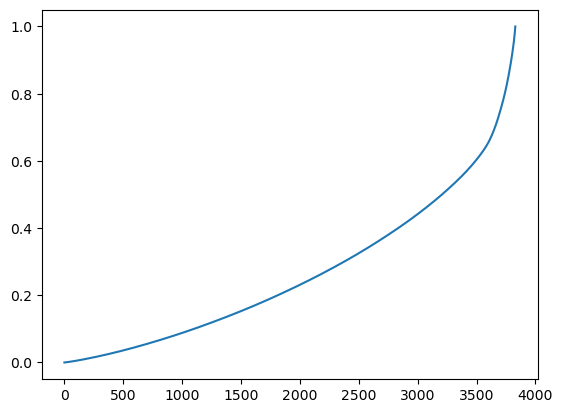

In [289]:
plt.plot(t)

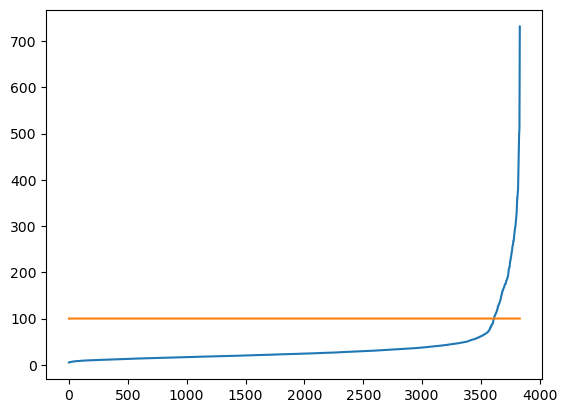

In [300]:
s = sorted(first['distance'].to_numpy())
s = np.array(s)
thresh = 100
plt.plot(s)
plt.plot([thresh]*len(s))


In [308]:
thresh = 60
len(s[s<thresh])/len(s)

0.8822454308093994

In [66]:
time_ids = [5]
while(len(time_ids)< len(final)):
    next = mfirst[mfirst['last_second'] == time_ids[-1]]
    if(next.shape[0] == 0):
        print("Do it live")
    dist = next.iloc[0,2]
    next = next.iloc[0,1]
    time_ids.append(next)
    
    if(len(time_ids) != len(set(time_ids))):
        print("Loop")
        break
    print(next)


NameError: name 'mfirst' is not defined

In [324]:
mfirst[mfirst['last_second'] == time_ids[-1]]

,first_second,last_second,distance
0,9352.0,5.0,31.196711
3830,7864.0,5.0,18.475531


In [148]:
[i for i in t if t[i] == 110]

[2458,
 3138,
 5285,
 6172,
 6434,
 6696,
 6909,
 6925,
 7564,
 8353,
 9445,
 9960,
 10017,
 10765,
 12061,
 12423,
 13735,
 13762,
 14995,
 16774,
 17727,
 18491,
 19136,
 20631,
 21431,
 22188,
 22455,
 23873,
 24161,
 27795,
 28395,
 29614,
 29802,
 32186]

In [489]:
newdf = pd.DataFrame()
for tid in chains[1671]:
    newdf = pd.concat([newdf,mydf[mydf['time_id'] == tid]])

In [490]:
newdf['time_id'] = [1]*len(newdf['time_id'])

In [492]:
newdf.to_csv('newdf.csv')

In [500]:
newdf

,seconds_in_bucket,time_id,stock_13.csv,stock_10.csv,stock_38.csv,stock_39.csv,stock_11.csv,stock_29.csv,stock_15.csv,stock_14.csv,...,stock_18.csv,stock_30.csv,stock_20.csv,stock_34.csv,stock_35.csv,stock_21.csv,stock_37.csv,stock_23.csv,stock_22.csv,stock_36.csv
1015200,0.0,1,46.775485,63.460085,287.950518,148.371961,135.312476,223.122925,119.550250,137.944749,...,672.668932,160.141056,136.515311,230.209540,68.935547,31.846059,2080.674236,306.726108,191.804531,93.569038
1015201,1.0,1,46.775485,63.460085,287.782193,148.371961,135.403691,223.126272,119.550250,137.943187,...,672.668932,159.951529,136.515311,230.243538,68.933659,31.846784,2080.674236,306.726108,191.804531,93.662225
1015202,2.0,1,46.775485,63.440082,287.782193,148.393176,135.440505,223.145194,119.556677,137.947752,...,672.668932,159.951529,136.515311,230.243538,68.933045,31.846784,2078.735113,306.735563,191.804531,93.662225
1015203,3.0,1,46.775485,63.440082,287.774694,148.373158,135.440505,223.161034,119.556677,137.941067,...,672.668932,159.951529,136.515311,230.255915,68.933045,31.846784,2078.735113,306.735563,191.804531,93.654594
1015204,4.0,1,46.775485,63.440082,287.782193,148.373158,135.440505,223.164612,119.556677,137.921007,...,672.668932,159.951529,136.515311,230.341908,68.924961,31.846833,2079.945998,306.735563,191.804531,93.656966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150195,595.0,1,46.403083,61.645054,293.172676,145.471707,131.888130,221.153736,119.266737,136.594052,...,696.327074,158.181760,136.676801,228.404721,69.730504,31.103173,2072.916565,303.659784,192.687492,91.108616
1150196,596.0,1,46.403083,61.644094,293.172676,145.472599,131.893476,221.152673,119.266737,136.594052,...,696.327074,158.187007,136.669646,228.404721,69.730504,31.103173,2072.916565,303.659784,192.687492,91.108616
1150197,597.0,1,46.403083,61.644094,293.172676,145.472599,131.893476,221.152296,119.266737,136.593916,...,696.327074,158.187007,136.673038,228.404721,69.739382,31.103173,2072.916565,303.659784,192.687492,91.108616
1150198,598.0,1,46.403083,61.644550,293.172676,145.472599,131.893476,221.162398,119.268826,136.593916,...,696.327074,158.145439,136.673038,228.404721,69.744227,31.103173,2072.916565,303.659784,192.687492,91.108616


In [493]:
clean

,seconds_in_bucket,time_id,stock_13.csv,stock_10.csv,stock_38.csv,stock_39.csv,stock_11.csv,stock_29.csv,stock_15.csv,stock_14.csv,...,stock_18.csv,stock_30.csv,stock_20.csv,stock_34.csv,stock_35.csv,stock_21.csv,stock_37.csv,stock_23.csv,stock_22.csv,stock_36.csv
0,0,5,1.000213,1.000127,1.001546,1.000408,1.001512,1.001905,0.999522,1.000666,...,1.001181,1.001724,0.999454,0.999254,1.000995,1.001424,1.002716,1.001483,1.000388,1.002266
1,1,5,1.000267,1.000000,1.001084,1.000195,1.002568,1.002141,1.000139,1.000915,...,1.001181,1.001724,0.999091,0.999229,1.000996,1.001424,1.002716,1.001452,1.000643,1.002125
2,2,5,1.000256,1.000172,1.001569,1.000293,1.001020,1.002171,0.999797,1.000916,...,1.001181,1.001724,0.999091,0.999254,1.000998,1.001529,1.002483,1.001146,1.000606,1.002267
3,3,5,1.000256,0.999778,1.001225,1.000251,1.001021,1.002130,1.000161,1.000781,...,1.001073,1.001724,0.999040,0.999229,1.000963,1.001430,1.002483,1.001096,1.000523,1.002267
4,4,5,1.000256,0.999978,1.001647,1.000129,1.001021,1.002022,0.999858,1.000899,...,1.001072,1.001742,0.999040,0.999229,1.000984,1.001509,1.002483,1.000815,1.000655,1.002344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2299795,595,32767,1.001495,0.998861,1.000567,1.000678,1.002088,1.000417,1.001014,1.001879,...,1.006431,1.000025,0.999924,1.002115,1.000996,0.999661,0.999698,0.998969,0.997065,1.000258
2299796,596,32767,1.001559,0.998950,1.000567,1.000678,1.002586,1.000447,1.001157,1.001879,...,1.006431,1.000025,0.999924,1.002115,1.000923,0.999756,0.999698,0.998969,0.997021,1.000263
2299797,597,32767,1.001564,0.998854,1.000550,1.000678,1.002586,1.000446,1.001164,1.001879,...,1.006431,1.000025,0.999924,1.002115,1.000960,0.999744,0.999698,0.999033,0.997021,1.000263
2299798,598,32767,1.001571,0.998866,1.000550,1.000678,1.002586,1.000487,1.001146,1.001879,...,1.006431,1.000025,0.999956,1.002115,1.000901,0.999746,0.999698,0.998969,0.997021,1.000263


,file,time_id,price_mult
305,stock_13.csv,2458,42.900043
4134,stock_10.csv,2458,68.823125
11779,stock_39.csv,2458,140.646976
15609,stock_11.csv,2458,144.300144
19439,stock_29.csv,2458,294.117647
...,...,...,...
410087,stock_21.csv,2458,31.796502
413917,stock_37.csv,2458,1754.385965
417747,stock_23.csv,2458,380.228137
421577,stock_22.csv,2458,257.069409


In [168]:
first

seconds_in_bucket       0.000000
time_id              2458.000000
stock_13.csv            0.998019
stock_10.csv            1.003853
stock_38.csv                 NaN
                        ...     
stock_21.csv            1.001207
stock_37.csv            0.990745
stock_23.csv            1.004828
stock_22.csv            0.999703
stock_36.csv            0.994017
Name: 184800, Length: 113, dtype: float64

In [177]:
# x = x.set_index("file")
x['price_mult']

file
stock_13.csv      42.900043
stock_10.csv      68.823125
stock_39.csv     140.646976
stock_11.csv     144.300144
stock_29.csv     294.117647
                   ...     
stock_21.csv      31.796502
stock_37.csv    1754.385965
stock_23.csv     380.228137
stock_22.csv     257.069409
stock_36.csv     145.772595
Name: price_mult, Length: 110, dtype: float64

In [178]:
first

seconds_in_bucket       0.000000
time_id              2458.000000
stock_13.csv            0.998019
stock_10.csv            1.003853
stock_38.csv                 NaN
                        ...     
stock_21.csv            1.001207
stock_37.csv            0.990745
stock_23.csv            1.004828
stock_22.csv            0.999703
stock_36.csv            0.994017
Name: 184800, Length: 113, dtype: float64

In [189]:
pd.concat([first,x['price_mult']],axis = 1)

,184800,price_mult
seconds_in_bucket,0.000000,NaN
time_id,2458.000000,NaN
stock_13.csv,0.998019,42.900043
stock_10.csv,1.003853,68.823125
stock_38.csv,NaN,NaN
...,...,...
stock_21.csv,1.001207,31.796502
stock_37.csv,0.990745,1754.385965
stock_23.csv,1.004828,380.228137
stock_22.csv,0.999703,257.069409


In [184]:
first

seconds_in_bucket       0.000000
time_id              2458.000000
stock_13.csv            0.998019
stock_10.csv            1.003853
stock_38.csv                 NaN
                        ...     
stock_21.csv            1.001207
stock_37.csv            0.990745
stock_23.csv            1.004828
stock_22.csv            0.999703
stock_36.csv            0.994017
Name: 184800, Length: 113, dtype: float64

In [200]:
from sklearn.manifold import TSNE

In [203]:
emb = TSNE().fit_transform(firsts)

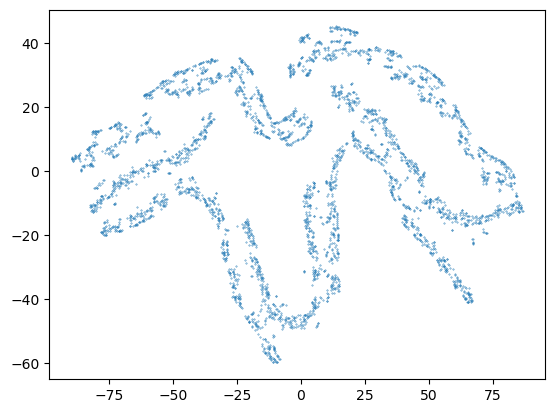

In [209]:
plt.scatter(emb[:,0],emb[:,1],s = 0.1)

In [269]:
t = clean[np.bitwise_and(clean['seconds_in_bucket'] == 0,np.bitwise_not(np.bitwise_not(np.bitwise_xor(t<0,t>=0)).any(axis = 1)))].iloc[:,2:]
bemb = TSNE().fit_transform(t)

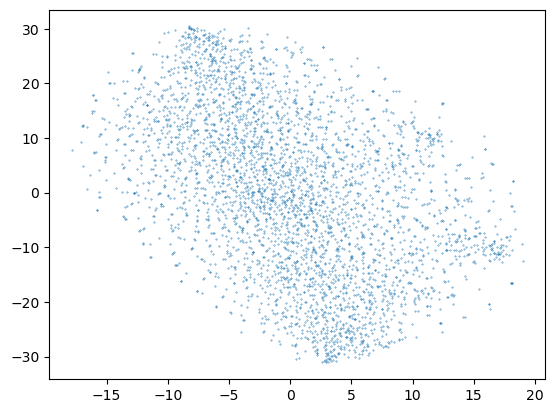

In [270]:
plt.scatter(bemb[:,0],bemb[:,1],s = 0.1)

In [256]:
t

,stock_13.csv,stock_10.csv,stock_38.csv,stock_39.csv,stock_11.csv,stock_29.csv,stock_15.csv,stock_14.csv,stock_28.csv,stock_16.csv,...,stock_18.csv,stock_30.csv,stock_20.csv,stock_34.csv,stock_35.csv,stock_21.csv,stock_37.csv,stock_23.csv,stock_22.csv,stock_36.csv
0,1.000213,1.000127,1.001546,1.000408,1.001512,1.001905,0.999522,1.000666,1.004152,1.002300,...,1.001181,1.001724,0.999454,0.999254,1.000995,1.001424,1.002716,1.001483,1.000388,1.002266
600,1.000829,0.999899,1.001292,1.000050,1.000029,1.000445,1.000083,1.000666,0.999952,1.000063,...,1.000540,1.000379,1.000124,1.000241,1.000811,1.000271,1.001099,1.000440,1.000104,0.999676
1200,0.999422,0.998568,0.998150,0.999170,1.000408,0.999956,0.999207,0.998856,0.999968,0.999260,...,1.000355,0.999615,0.999688,0.999291,0.999977,0.998404,1.000442,0.999952,1.000294,0.999276
1800,1.000213,1.000127,1.001546,1.000408,1.001512,1.001905,0.999522,1.000666,1.004152,1.002300,...,1.001181,1.001724,0.999454,0.999254,1.000995,1.001424,1.002716,1.001483,1.000388,1.002266
2400,1.000829,0.999899,1.001292,1.000050,1.000029,1.000445,1.000083,1.000666,0.999952,1.000063,...,1.000540,1.000379,1.000124,1.000241,1.000811,1.000271,1.001099,1.000440,1.000104,0.999676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2296800,1.001136,0.998837,0.999372,1.000393,1.000347,0.999135,0.999473,1.000940,0.997372,0.999844,...,0.999799,0.998718,0.999979,1.001633,1.001455,0.998864,0.999223,0.999855,1.000653,0.999466
2297400,0.998849,1.000875,0.999053,0.999076,0.999837,1.000347,1.000006,0.999312,0.999654,0.999533,...,1.000047,0.999667,0.999569,0.999828,1.000102,0.998811,0.997525,0.999758,0.999720,0.998544
2298000,1.000021,1.000361,1.001809,0.999413,1.000358,0.999635,0.999843,1.000060,0.999531,0.999475,...,0.999527,1.000185,1.000130,0.999701,1.000200,0.999671,1.001071,0.999474,1.001695,1.000379
2298600,0.999491,1.000005,1.000938,0.999977,0.999617,1.000039,0.999837,1.000570,0.998625,1.000056,...,0.999696,1.000050,1.001326,1.000552,1.003055,0.999628,1.000744,1.000009,0.998215,1.000706
